## Setup

# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

### Import, Style and options

In [525]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300}) # change figure.dpi to 200 when exporting figures
sns.set_style("ticks")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

### Database/Dataframe

In [526]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [527]:
questions = pd.read_sql_query("SELECT * FROM Question WHERE questionid NOT IN \
    (4, 6, 8, 22, 23, 24, 25, 26, 27, 28, 32, 49, 51, 55, 59, 61, 63, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 82, 84, 86, 87, 88, 89, 103, 108, 109, 110, 111, 112, 116)", con)

In [528]:
# Only select answer from people, whose primary role is IT/Tech
df = pd.read_sql_query("Select * from Answer where UserID IN (Select UserID from Answer Where QuestionID=13 and AnswerText='1')", con)

In [529]:
df.rename(columns={'SurveyID': 'Year'}, inplace = True)
df['AnswerText'] = np.where((df.AnswerText == '-1'), 'n/a', df.AnswerText)

### Functions

In [530]:
def get_answers(question_id):
    return df[(df['QuestionID'] == question_id)]

In [531]:
def append_count_in_percent(grouped_df):
    return (grouped_df['Count'] / grouped_df['Count'].sum())*100 

In [532]:
def append_count_in_percent_by_group(grouped_df, group_by_value):
    return (grouped_df['Count'] / grouped_df.groupby(group_by_value)['Count'].transform('sum'))*100

## Question catalog

In [533]:
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,Are you self-employed?,5
4,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
5,Is your employer primarily a tech company/organization?,9
6,Does your employer provide mental health benefits as part of healthcare coverage?,10
7,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,11
8,Would you bring up a mental health issue with a potential employer in an interview?,12
9,Is your primary role within your company related to tech/IT?,13


In [534]:
# Q1: "What is your age?"
q1 = get_answers(1)
q1.rename(columns={'AnswerText': 'Age'}, inplace = True)

In [535]:
# Q2: "What is your gender?"
q2 = get_answers(2)
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [536]:
# Q3: "What country do you live in?"
q3 = get_answers(3)
q3.rename(columns={'AnswerText': 'Country'}, inplace = True)

In [537]:
# Q5: "Are you self-employed?"
q5 = get_answers(5)
q5.rename(columns={'AnswerText': 'Self_employed'}, inplace = True)

In [538]:
# Q32: "Have you had a mental health disorder in the past?"
q32 = get_answers(32)
q32.rename(columns={'AnswerText': 'Had_disorder'}, inplace = True)

In [539]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_answers(33)
q33.rename(columns={'AnswerText': 'Has_disorder'}, inplace = True)

In [540]:
# Q115: "If yes, what condition(s) have you been diagnosed with?" | only 2016!
q115 = get_answers(115)
q115.rename(columns={'AnswerText': 'Disorder'}, inplace = True)

In [541]:
# Q118: "Do you work remotely?"
q118 = get_answers(118)
q118.rename(columns={'AnswerText': 'Remote_work'}, inplace = True)

## Descriptive statistics

### Q1: Age distribution

In [542]:
q1['Age'] = pd.to_numeric(q1['Age'])
q1.drop(q1[q1.Age == 0].index, inplace=True) # impossible value

In [543]:
q1.describe()

,Age,Year,UserID,QuestionID
count,1470.000000,1470.00000,1470.000000,1470.0
mean,34.862585,2017.44898,3223.034694,1.0
std,8.047605,0.98376,686.220615,0.0
min,19.000000,2016.00000,1265.000000,1.0
25%,29.000000,2017.00000,2844.250000,1.0
50%,34.000000,2017.00000,3318.500000,1.0
75%,40.000000,2018.00000,3763.750000,1.0
max,66.000000,2019.00000,4218.000000,1.0


In [544]:
# Group and count by age
q1_by_age = q1.groupby('Age').size().reset_index(name='Count')
q1_by_age['%'] = append_count_in_percent(q1_by_age)

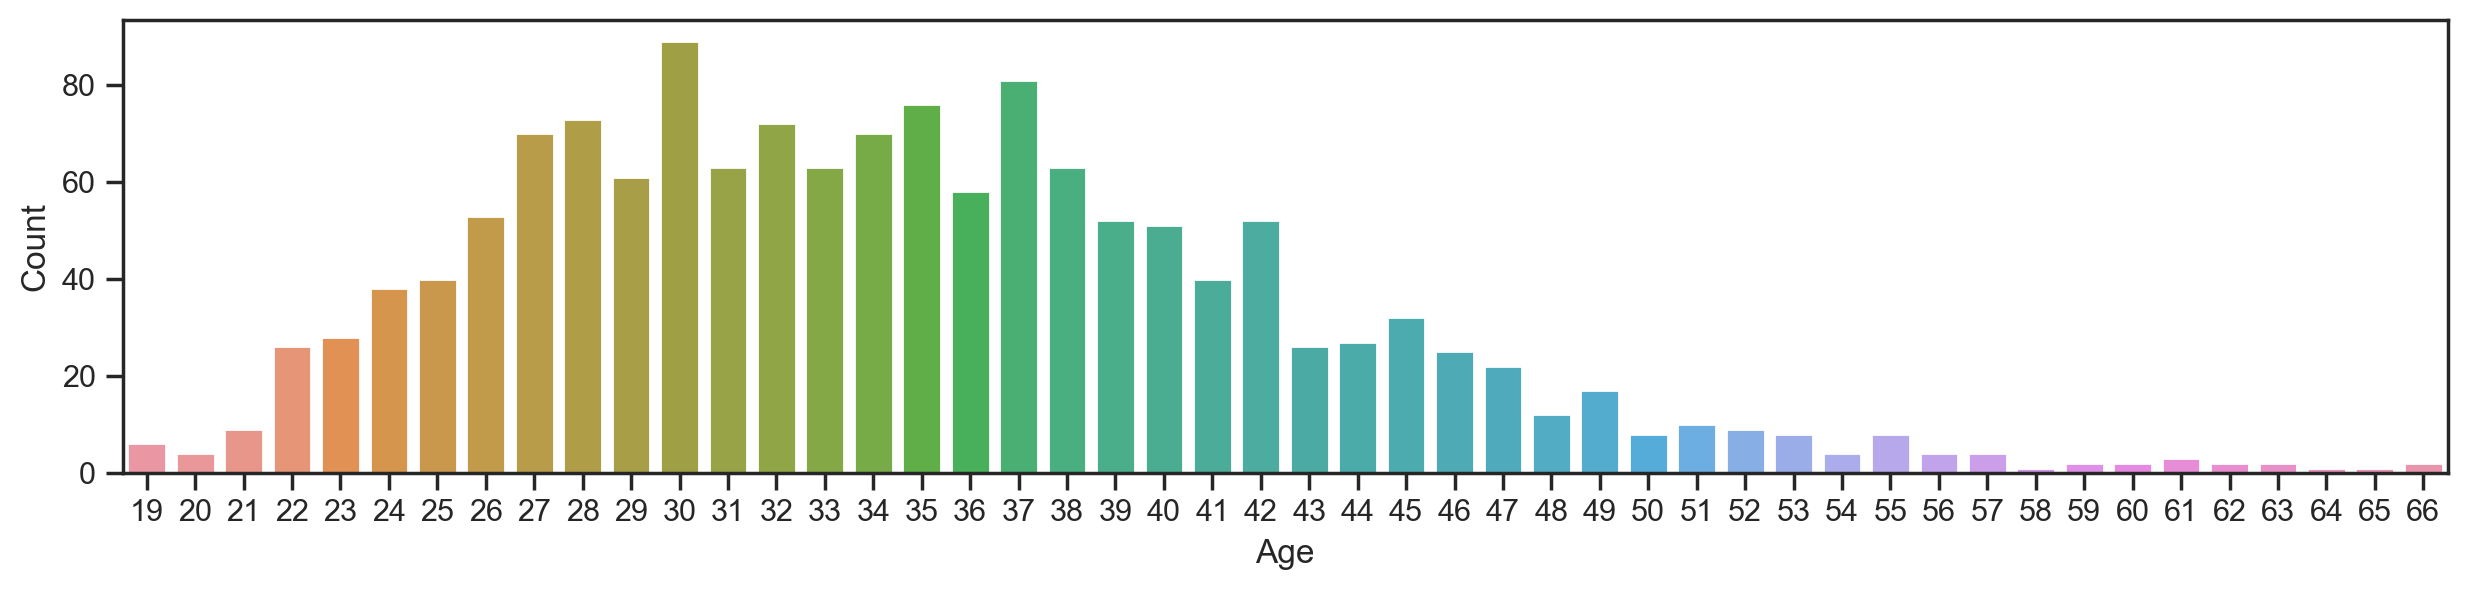

In [545]:
# Age distribution overall, visualized as bar plot
plt.subplots(figsize=(15, 3))
age_barplot = sns.barplot(x = 'Age', y = 'Count', data = q1_by_age)

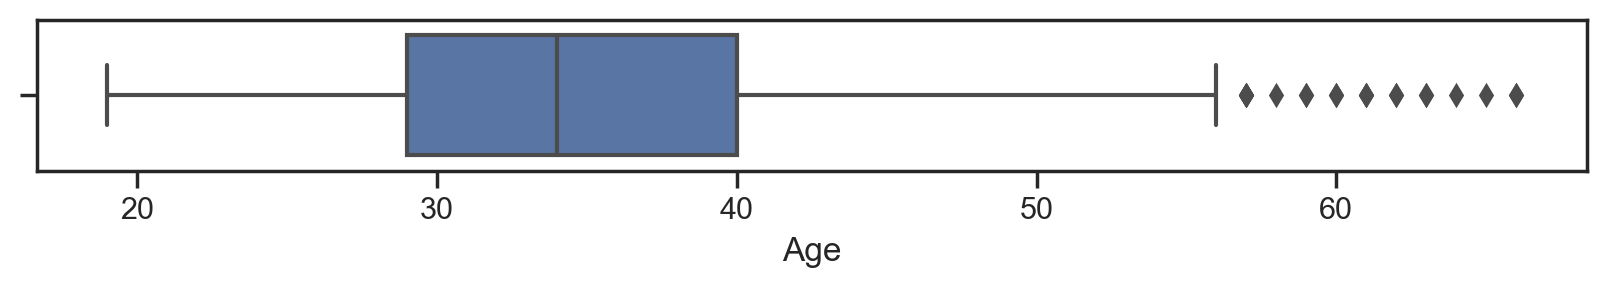

In [568]:
# Age distribution overall, visualized as box plot
plt.subplots(figsize=(10, 1))
age_boxplot = sns.boxplot(x=q1.Age)

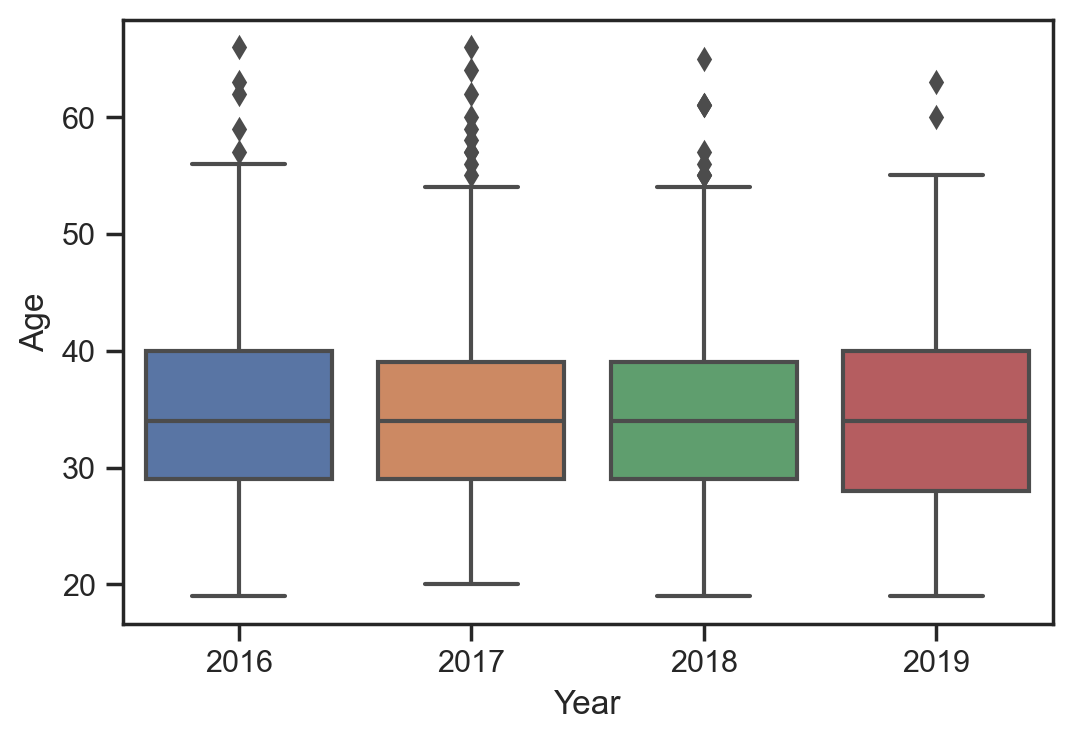

In [569]:
# Age distribution by year, visualized as box plot
age_boxplot_2 = sns.boxplot(x=q1.Year, y=q1.Age)

### Q2: Gender distribution

In [548]:
# capitalize answers to group them properly
q2.Gender = np.where((q2.Gender != 'n/a'), q2.Gender.str.capitalize(), q2.Gender)

In [549]:
# Change non-"Male" and non-"Female" to "Other"
q2.Gender = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female') & (q2.Gender != 'n/a')), 'Other', q2.Gender)

In [550]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name='Count')
q2_by_year['%'] = append_count_in_percent(q2_by_year)
q2_by_year

,Year,Count,%
0,2016,248,16.859279
1,2017,595,40.448674
2,2018,346,23.521414
3,2019,282,19.170632


In [551]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name='Count') 
q2_by_gender['%'] = append_count_in_percent(q2_by_gender)
q2_by_gender

,Gender,Count,%
0,Female,401,27.260367
1,Male,999,67.912984
2,Other,59,4.010877
3,n/a,12,0.815772


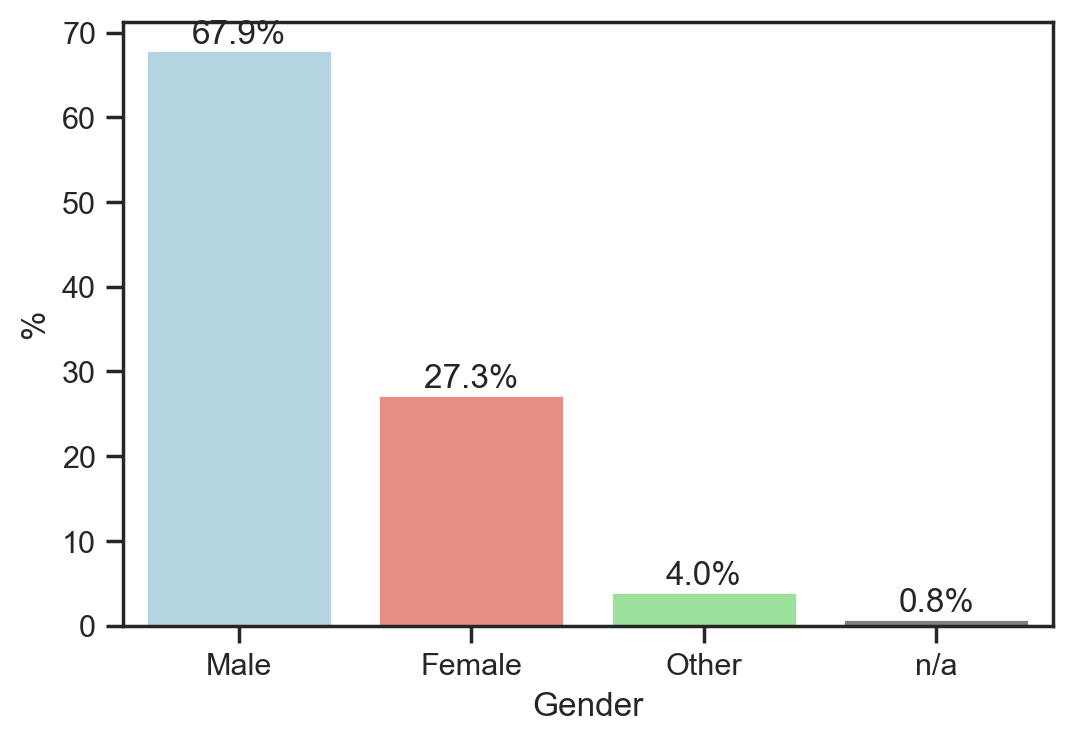

In [552]:
gender_barplot = sns.barplot(x = 'Gender', y = '%', data = q2_by_gender, order=['Male', 'Female', 'Other', 'n/a'], palette=['lightblue', 'salmon', 'lightgreen', 'grey'])
for container in gender_barplot.containers:
    gender_barplot.bar_label(container,fmt='%.1f%%')

In [553]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name='Count') 
q2_by_gender_and_year['%'] = append_count_in_percent_by_group(q2_by_gender_and_year, 'Year')

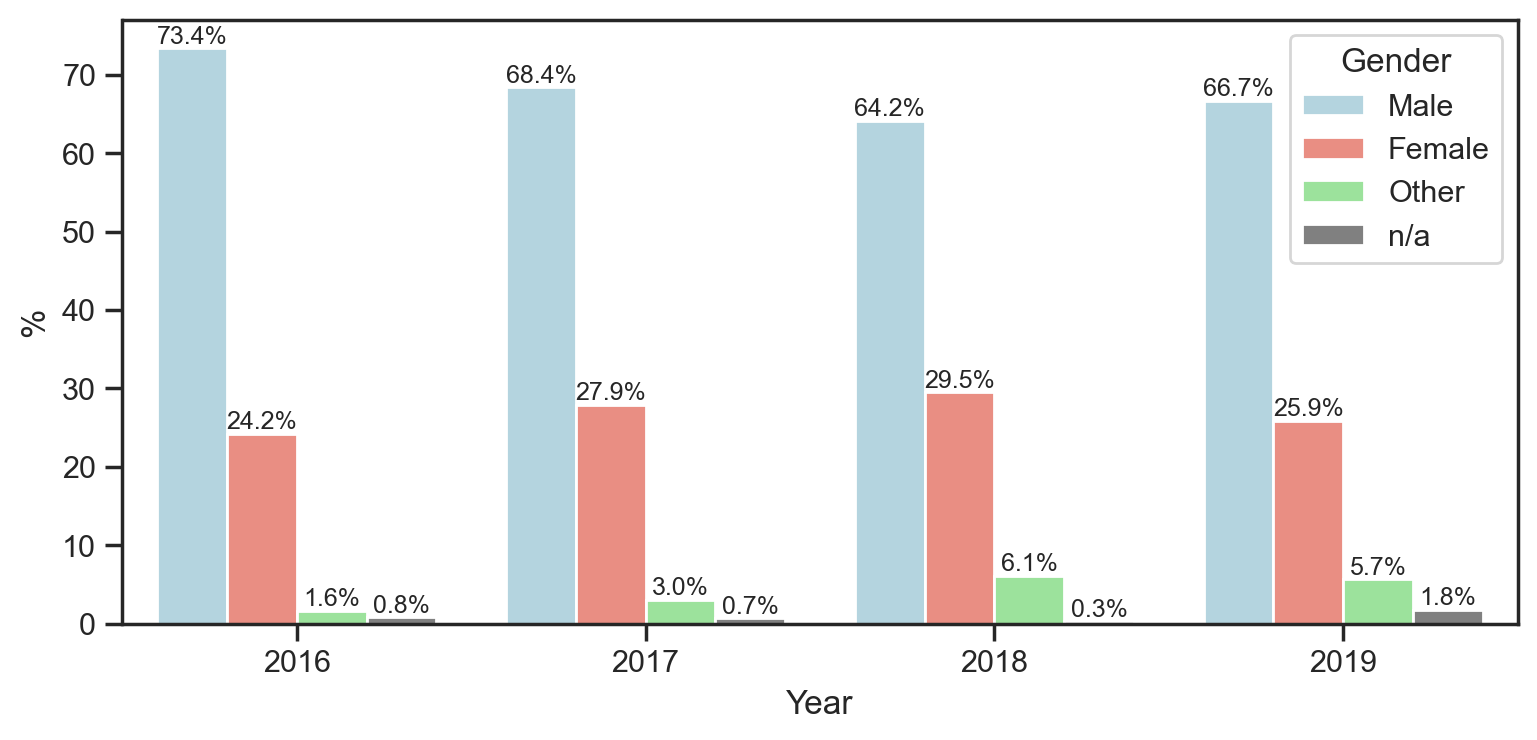

In [554]:
# Gender distribution by year, visualized
plt.subplots(figsize=(9, 4))
gender_barplot_by_year = sns.barplot(x = 'Year', y = '%', hue = 'Gender', data = q2_by_gender_and_year, \
    hue_order=['Male', 'Female', 'Other', 'n/a'], palette=['lightblue', 'salmon', 'lightgreen', 'grey'])

# add labels to bars
for container in gender_barplot_by_year.containers:
    gender_barplot_by_year.bar_label(container, fmt='%.1f%%', fontsize=9)

### Q1,2

In [555]:
q1_by_gender = pd.merge(q1, q2, on='UserID', how='inner')
mean_age_by_gender = q1_by_gender.groupby('Gender')['Age'].mean()
mean_age_by_gender

Gender
Female    33.877805
Male      35.470942
Other     31.627119
n/a       33.083333
Name: Age, dtype: float64

### Q3: Origin distribution

In [556]:
# Participation by country
q3_by_country = q3.groupby('Country').size().reset_index(name='Count')
q3_by_country['%'] = append_count_in_percent(q3_by_country)
print('Number of countries: ' + str(len(q3_by_country.index)))

Number of countries: 55


In [557]:
# Top 10 country participation
q3_by_country_top_10 = q3_by_country.nlargest(10, 'Count')
q3_by_country_top_10.sort_values('Count', ascending = False)

,Country,Count,%
53,United States of America,1010,68.660775
52,United Kingdom,123,8.361659
8,Canada,37,2.515296
18,Germany,34,2.311353
24,India,25,1.699524
33,Netherlands,24,1.631543
17,France,20,1.359619
6,Brazil,18,1.223657
39,Portugal,18,1.223657
47,Spain,16,1.087695


### Q5: Self-employment ratio

In [558]:
# Change: 1 -> Yes, 0 -> No
q5['Self_employed'] = np.where((q5.Self_employed == '1'), 'Yes', q5.Self_employed)
q5['Self_employed'] = np.where((q5.Self_employed == '0'), 'No', q5.Self_employed)

In [559]:
# Group and count by answer
q5_by_answer = q5.groupby('Self_employed').size().reset_index(name='Count')
q5_by_answer['%'] = append_count_in_percent(q5_by_answer)
q5_by_answer

,Self_employed,Count,%
0,No,1471,100.0


### Q115: Disorder by type (only 2016)

In [560]:
disorder_by_type = q115.groupby('Disorder').size().reset_index(name='Count')
disorder_by_type.drop(disorder_by_type[disorder_by_type.Disorder == 'Transgender'].index, inplace = True)
disorder_by_type.sort_values(by=['Count'], ascending = False, inplace=True)
disorder_by_type['%'] = append_count_in_percent(disorder_by_type)

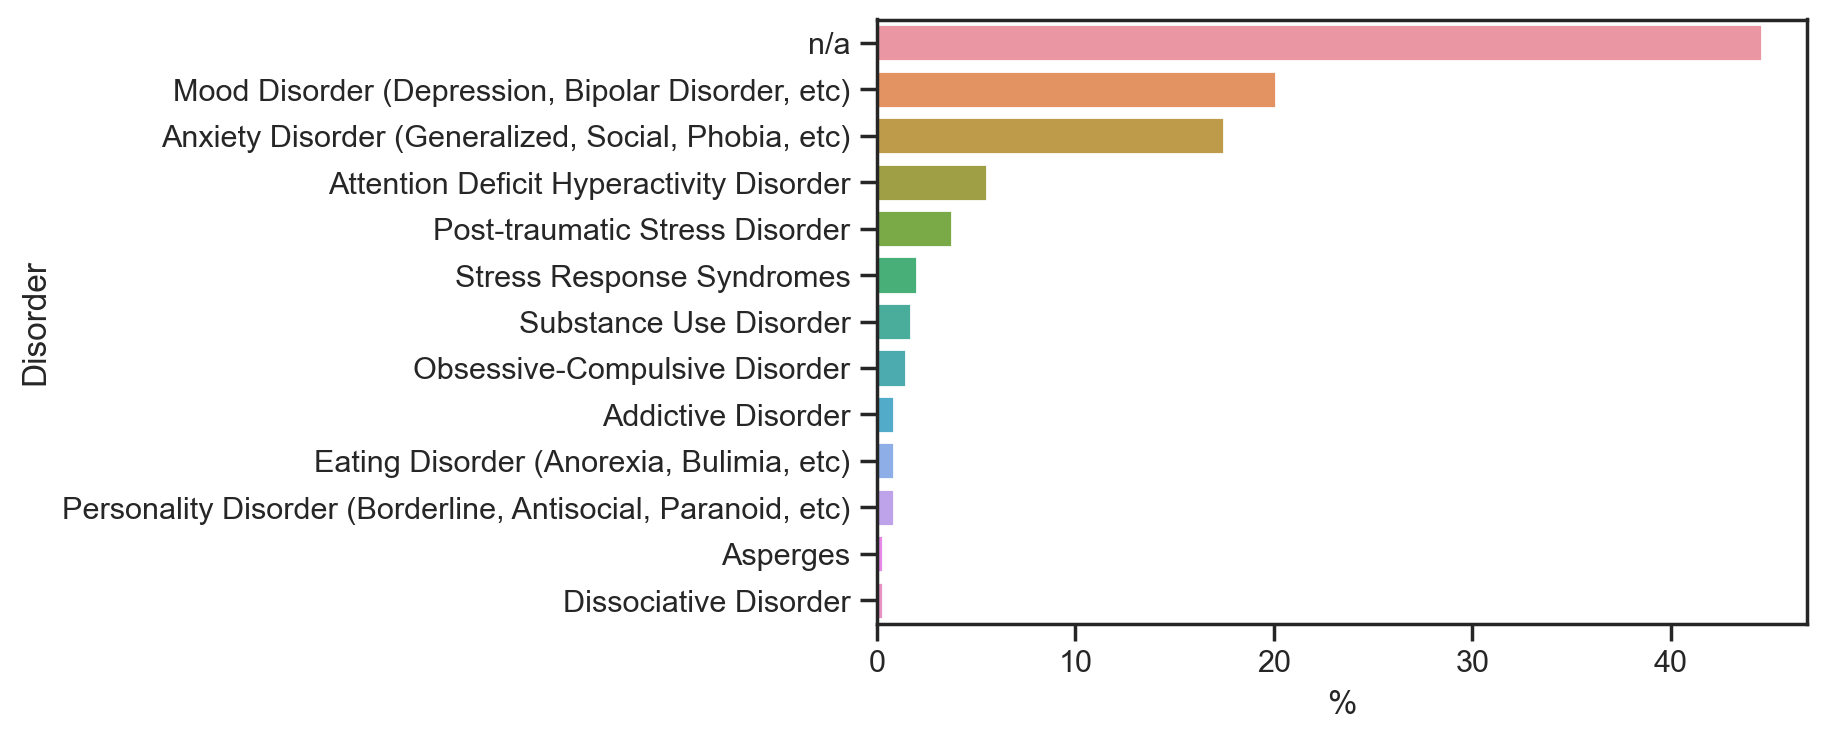

In [561]:
disorder_by_type_barplot = sns.barplot(x = '%', y = 'Disorder', data = disorder_by_type, orient='h')

## Hypotheses

### Häufigkeitsverteilung psychischer Erkrankungen nach Jahr

In [562]:
# Standardize answers
q33['Has_disorder'] = np.where((q33.Has_disorder == 'Maybe'), 'Possibly', q33.Has_disorder)

In [563]:
# Group and count by Answer and Year
has_disorder_by_year = q33.groupby(['Has_disorder', 'Year']).size().reset_index(name='Count')
has_disorder_by_year['%'] = append_count_in_percent_by_group(has_disorder_by_year, 'Year')
has_disorder_by_year

,Has_disorder,Year,Count,%
0,Don't Know,2017,55,9.243697
1,Don't Know,2018,23,6.647399
2,Don't Know,2019,20,7.092199
3,No,2016,95,38.306452
4,No,2017,172,28.907563
5,No,2018,95,27.456647
6,No,2019,83,29.432624
7,Possibly,2016,56,22.580645
8,Possibly,2017,115,19.327731
9,Possibly,2018,71,20.520231


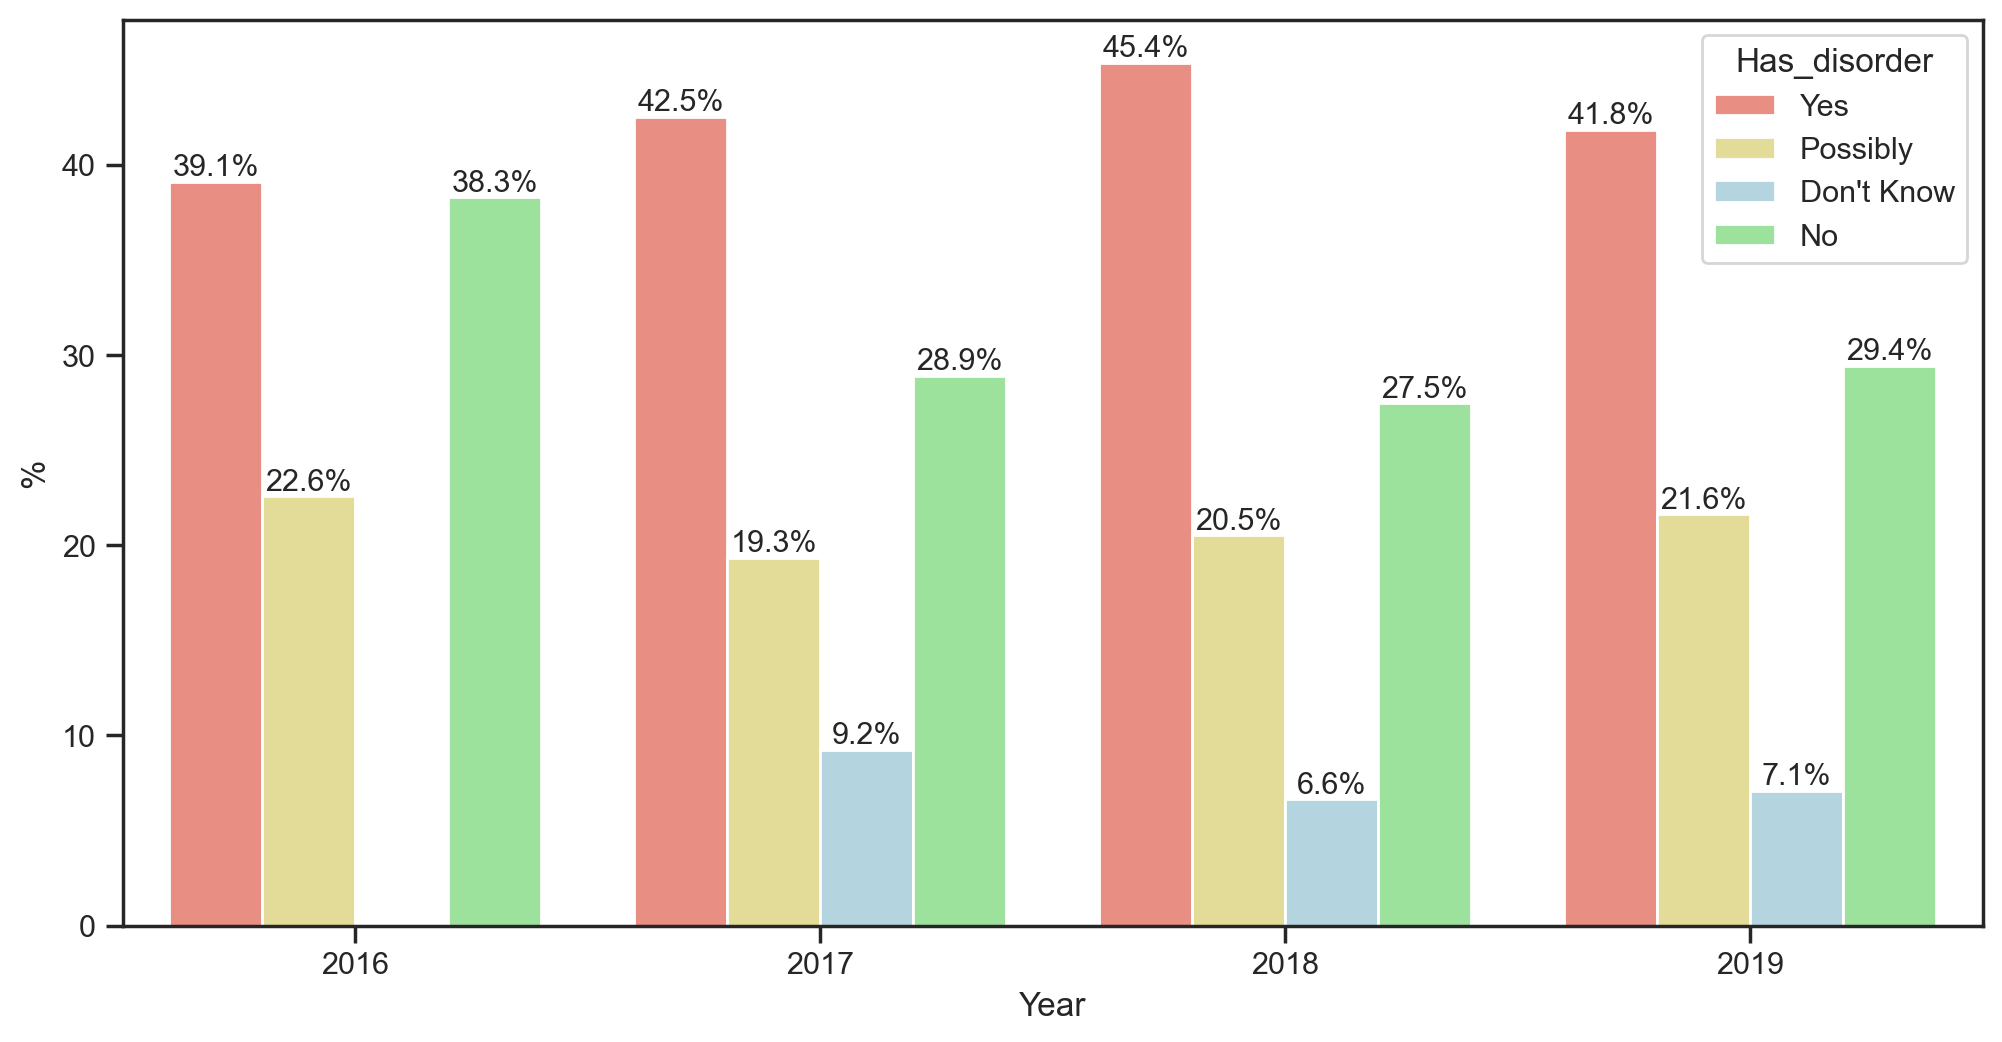

In [564]:
# Currently affected by a mental disorder, visualized
plt.subplots(figsize=(12, 6))
has_disorder_barplot = sns.barplot(x = 'Year', y = '%', hue = 'Has_disorder', data = has_disorder_by_year, \
    hue_order=['Yes', 'Possibly', 'Don\'t Know', 'No'], palette=['salmon', 'khaki','lightblue', 'lightgreen'])
for container in has_disorder_barplot.containers:
    has_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

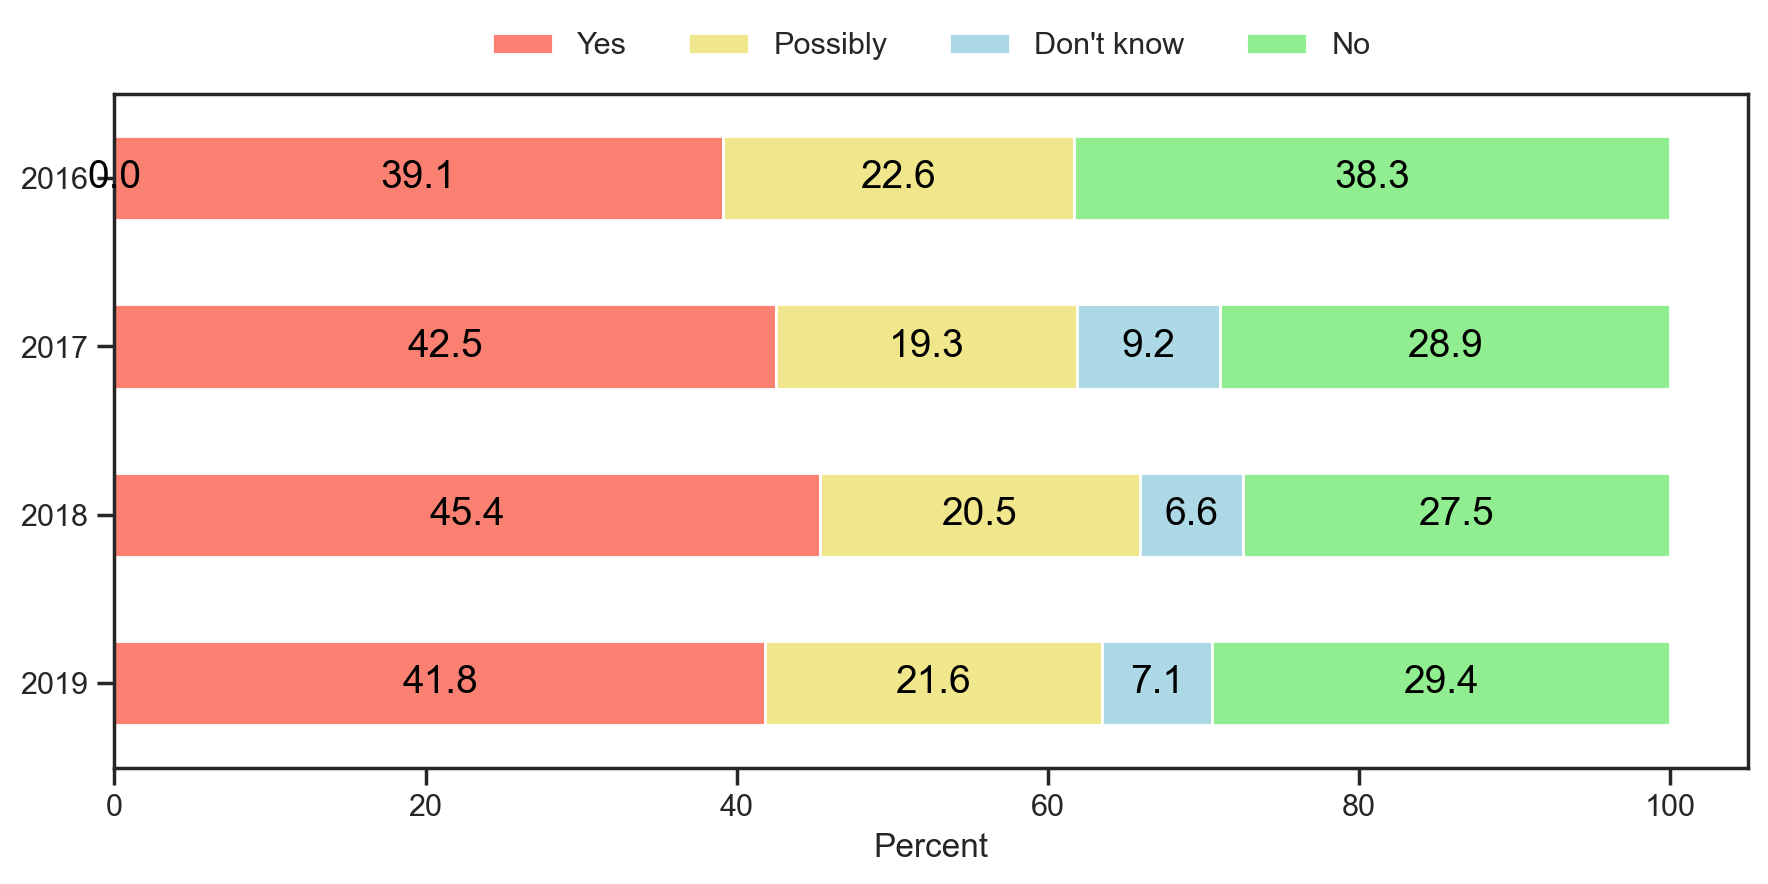

In [576]:
df_disorder_by_year = pd.DataFrame({\
    'Yes': [97, 253, 157, 118],
    'Possibly': [56, 115, 71, 61],
    'Don\'t know': [0, 55, 23, 20],
    'No': [95, 172, 95, 83]}, index = ['2016', '2017', '2018', '2019']
    )
df_disorder_by_year = df_disorder_by_year.apply(lambda x: x*100/sum(x), axis=1)
s1 = df_disorder_by_year.plot.barh(align='center',stacked=True, figsize=(9,4), color=['salmon', 'khaki', 'lightblue', 'lightgreen'])
s1.invert_yaxis()
plt.tight_layout()
s1.legend(loc='center', frameon=False, bbox_to_anchor=(0., 1.02, 1., .102), ncol=4)
plt.xlabel('Percent')

for p in s1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    s1.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black',
            fontsize=14)



### Häufigkeitsverteilung psychischer Erkrankungen nach Geschlecht

In [566]:
# Mental disorder by gender
q2_q33 = pd.merge(q2, q33, on='UserID', how='inner')
disorder_by_gender = q2_q33.groupby(['Gender', 'Has_disorder']).size().reset_index(name='Count')
disorder_by_gender['%'] = append_count_in_percent_by_group(disorder_by_gender, 'Gender')
disorder_by_gender

,Gender,Has_disorder,Count,%
0,Female,Don't Know,20,4.987531
1,Female,No,91,22.693267
2,Female,Possibly,72,17.955112
3,Female,Yes,218,54.364090
4,Male,Don't Know,75,7.507508
5,Male,No,341,34.134134
6,Male,Possibly,217,21.721722
7,Male,Yes,366,36.636637
8,Other,Don't Know,2,3.389831
9,Other,No,9,15.254237


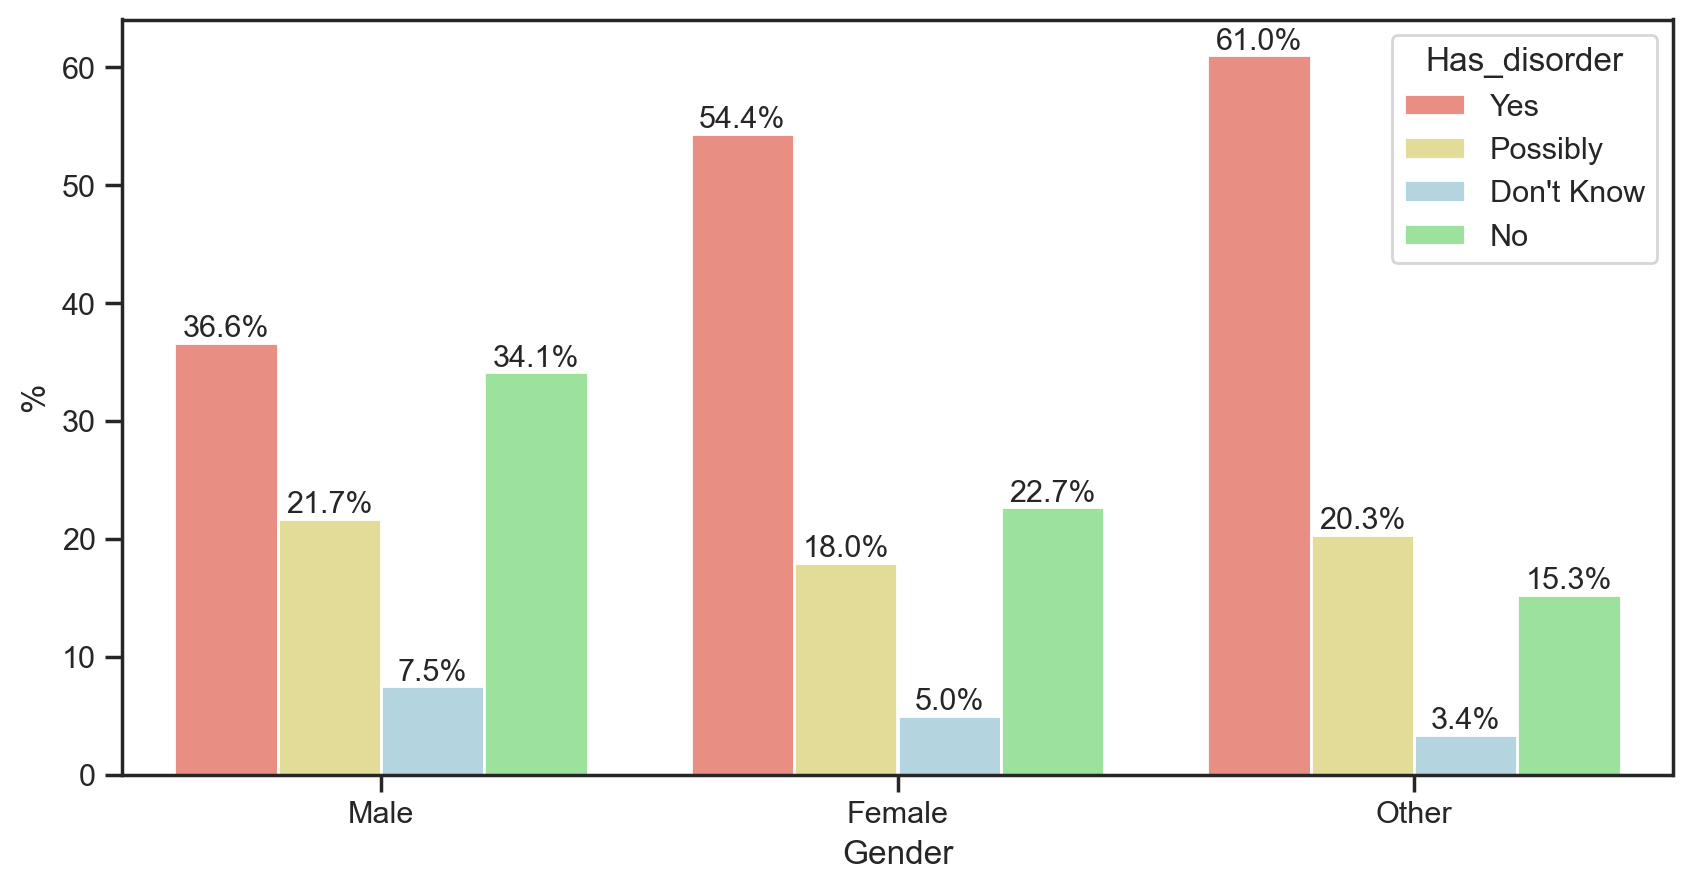

In [567]:
# Status of mental disorder by gender, visualized
plt.subplots(figsize=(10, 5))
gender_disorder_barplot = sns.barplot(x = 'Gender', y = '%', hue = 'Has_disorder', data = disorder_by_gender, \
    order = ['Male', 'Female', 'Other'], hue_order=['Yes', 'Possibly','Don\'t Know', 'No'], palette=['salmon', 'khaki','lightblue', 'lightgreen'])

for container in gender_disorder_barplot.containers:
   gender_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

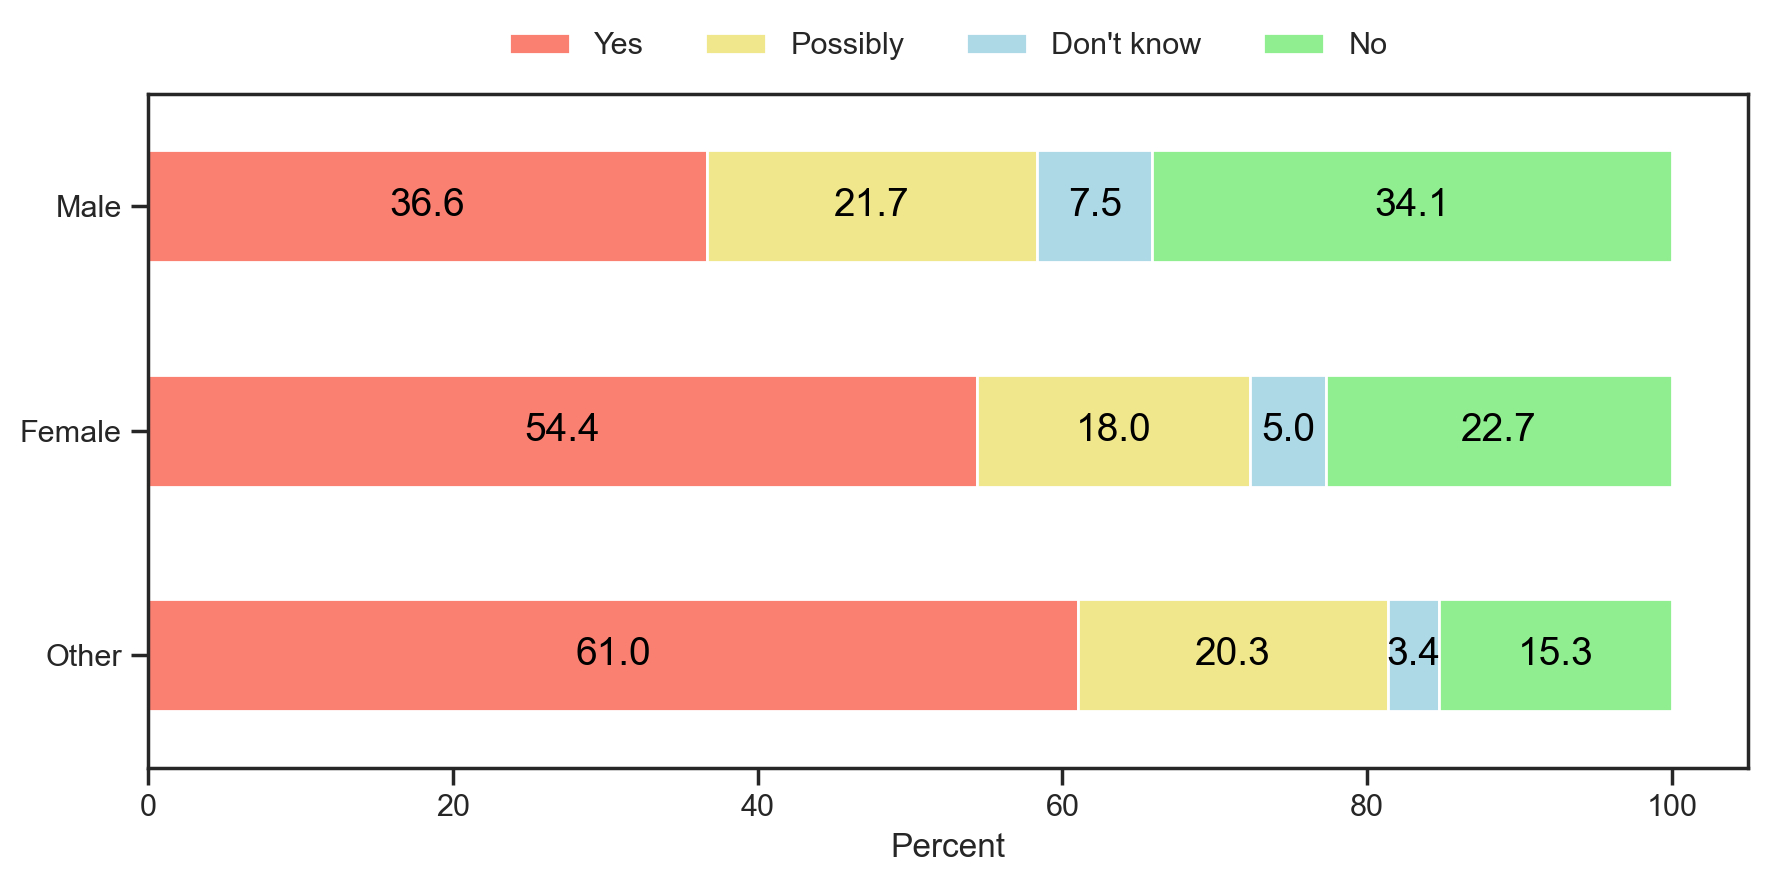

In [579]:
df_disorder_by_gender = pd.DataFrame({\
    'Yes': [366, 218, 36],
    'Possibly': [217, 72, 12],
    'Don\'t know': [75, 20, 2],
    'No': [341, 91, 9]}, index = ['Male', 'Female', 'Other']
    )

df_disorder_by_gender = df_disorder_by_gender.apply(lambda x: x*100/sum(x), axis=1)
s2 = df_disorder_by_gender.plot.barh(align='center',stacked=True, figsize=(9,4), color=['salmon', 'khaki', 'lightblue', 'lightgreen'])
s2.invert_yaxis()
plt.tight_layout()
s2.legend(loc='center', frameon=False, bbox_to_anchor=(0., 1.02, 1., .102), ncol=4)
plt.xlabel('Percent')

for p in s2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    s2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black',
            fontsize=14)